### Capstone3 Loan Default Classification 

The finance sector is focused around one essential mathematical problem – how can we assess and quantify risk? While this is usually calculated by large firms, in recent years more and more opportunities have arisen for individuals to not only buy but also sell financial products. LendingClub, a financial services company headquartered in San Francisco, California, enables borrowers to create unsecured personal loans between $1,000 and $40,000 and investors to search and browse the loan listing on LendingClub website. This puts normal people in the same position as banks, allowing them to select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. 


But with individuals acting as banks, they then have the same problem as banks do – how can they accurately assess the risk of giving a loan to maximize their return? With Machine Learning, I aim to help answer this question by building a model that can evaluate and learn from previous loans to help recommend the best loans for individuals to invest in. 
Data link: https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv




### Import Libraries

In [94]:
import numpy as np
import scipy as sp
import pandas as pd

# plotting and visualization
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split,cross_validate,KFold, GridSearchCV,cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc,precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree, metrics
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance

import warnings
  
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')
# This warning won't display due to the disabled warnings
warnings.warn('Error: A warning just appeared')

# Data Wrangling


In [95]:
import pandas as pd
df=pd.read_csv("/kaggle/input/lendingdata/XYZCorp_LendingData.txt", delimiter="\t")
print(df.shape)
df.head()


(855969, 73)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [96]:
# drop non-important features
cols=["loan_amnt","funded_amnt","id","member_id","emp_title","issue_d","desc","title","zip_code","earliest_cr_line","mths_since_last_delinq",
      "mths_since_last_record","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","mths_since_last_major_derog",
      "verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m",
      "mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl",
      "inq_last_12m","annual_inc_joint","dti_joint","addr_state","policy_code",'sub_grade','total_pymnt','out_prncp','out_prncp_inv','application_type',
      "delinq_2yrs","pub_rec","total_rec_late_fee","collections_12_mths_ex_med"]
df=df.drop(columns=cols)
df.head()

,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,...,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,default_ind
0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,n,...,13648.0,83.7,9.0,f,5831.78,5000.00,861.07,0.00,0.00,0
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,n,...,1687.0,9.4,4.0,f,1008.71,456.46,435.17,117.08,1.11,1
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,n,...,2956.0,98.5,10.0,f,3003.65,2400.00,603.65,0.00,0.00,0
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,n,...,5598.0,21.0,37.0,f,12226.30,10000.00,2209.33,0.00,0.00,0
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,n,...,27783.0,53.9,38.0,f,3242.17,2233.10,1009.07,0.00,0.00,0


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amnt_inv,855969.0,14700.061226,8425.805478,0.00,8000.00,13000.00,20000.00,35000.00
int_rate,855969.0,13.192320,4.368365,5.32,9.99,12.99,15.99,28.99
installment,855969.0,436.238072,243.726876,15.69,260.55,382.55,571.56,1445.46
annual_inc,855969.0,75071.185963,64264.469813,0.00,45000.00,65000.00,90000.00,9500000.00
dti,855969.0,18.122165,17.423629,0.00,11.88,17.61,23.90,9999.00
inq_last_6mths,855969.0,0.680915,0.964033,0.00,0.00,0.00,1.00,8.00
open_acc,855969.0,11.542447,5.308094,0.00,8.00,11.00,14.00,90.00
revol_bal,855969.0,16910.526992,22223.741577,0.00,6469.00,11903.00,20857.00,2904836.00
revol_util,855523.0,55.019405,23.811585,0.00,37.60,55.90,73.50,892.30
total_acc,855969.0,25.269269,11.818841,2.00,17.00,24.00,32.00,169.00


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funded_amnt_inv          855969 non-null  float64
 1   term                     855969 non-null  object 
 2   int_rate                 855969 non-null  float64
 3   installment              855969 non-null  float64
 4   grade                    855969 non-null  object 
 5   emp_length               812908 non-null  object 
 6   home_ownership           855969 non-null  object 
 7   annual_inc               855969 non-null  float64
 8   verification_status      855969 non-null  object 
 9   pymnt_plan               855969 non-null  object 
 10  purpose                  855969 non-null  object 
 11  dti                      855969 non-null  float64
 12  inq_last_6mths           855969 non-null  float64
 13  open_acc                 855969 non-null  float64
 14  revo

In [99]:
# missing data
df.isnull().sum()

funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                 43061
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
purpose                        0
dti                            0
inq_last_6mths                 0
open_acc                       0
revol_bal                      0
revol_util                   446
total_acc                      0
initial_list_status            0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
recoveries                     0
collection_recovery_fee        0
default_ind                    0
dtype: int64

## Categorical Features

In [100]:
# list categorical features
c_df=df.select_dtypes("object")
c_df.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status
0,36 months,B,10+ years,RENT,Verified,n,credit_card,f
1,60 months,C,< 1 year,RENT,Source Verified,n,car,f
2,36 months,C,10+ years,RENT,Not Verified,n,small_business,f
3,36 months,C,10+ years,RENT,Source Verified,n,other,f
4,60 months,B,1 year,RENT,Source Verified,n,other,f


In [101]:
# count values of categorical features to see if there is any special values?
for x in c_df.columns:
    print("\n",c_df[x].value_counts())
    


 term
 36 months    600221
 60 months    255748
Name: count, dtype: int64

 grade
B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: count, dtype: int64

 emp_length
10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: count, dtype: int64

 home_ownership
MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: count, dtype: int64

 verification_status
Source Verified    318178
Verified           280049
Not Verified       257742
Name: count, dtype: int64

 pymnt_plan
n    855964
y         5
Name: count, dtype: int64

 purpose
debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car               

### Convert categorical features to numeric features

In [102]:

# convert employment length to numberic to shorten dataframe for modeling later on 
df.emp_length=df.emp_length.str.replace("< 1 year",'0.5 year')
df.emp_length=df.emp_length.str.replace("10+ years",'10 years')
print(df.emp_length.unique())

df.emp_length=df.emp_length.str.replace("years",'')
df.emp_length=df.emp_length.str.replace('year','')
print(df.emp_length.unique())
df.emp_length=df.emp_length.astype("float")

# # convert tem to numberic to shorten dataframe for modeling later on  
df.term=df.term.str.replace("months",'')
df.term=df.term.astype("int")
df.info()


['10 years' '0.5 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10 ' '0.5 ' '1 ' '3 ' '8 ' '9 ' '4 ' '5 ' '6 ' '2 ' '7 ' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funded_amnt_inv          855969 non-null  float64
 1   term                     855969 non-null  int64  
 2   int_rate                 855969 non-null  float64
 3   installment              855969 non-null  float64
 4   grade                    855969 non-null  object 
 5   emp_length               812908 non-null  float64
 6   home_ownership           855969 non-null  object 
 7   annual_inc               855969 non-null  float64
 8   verification_status      855969 non-null  object 
 9   pymnt_plan               855969 non-null  object 
 10  purpose                  855969 non-null  

Remove un-wanted texts in employment length column and convert it from object to numeric to avoid creating more dummies before modeling. Basicaly, keep the data frame at a manageble size.

## Numeric Features

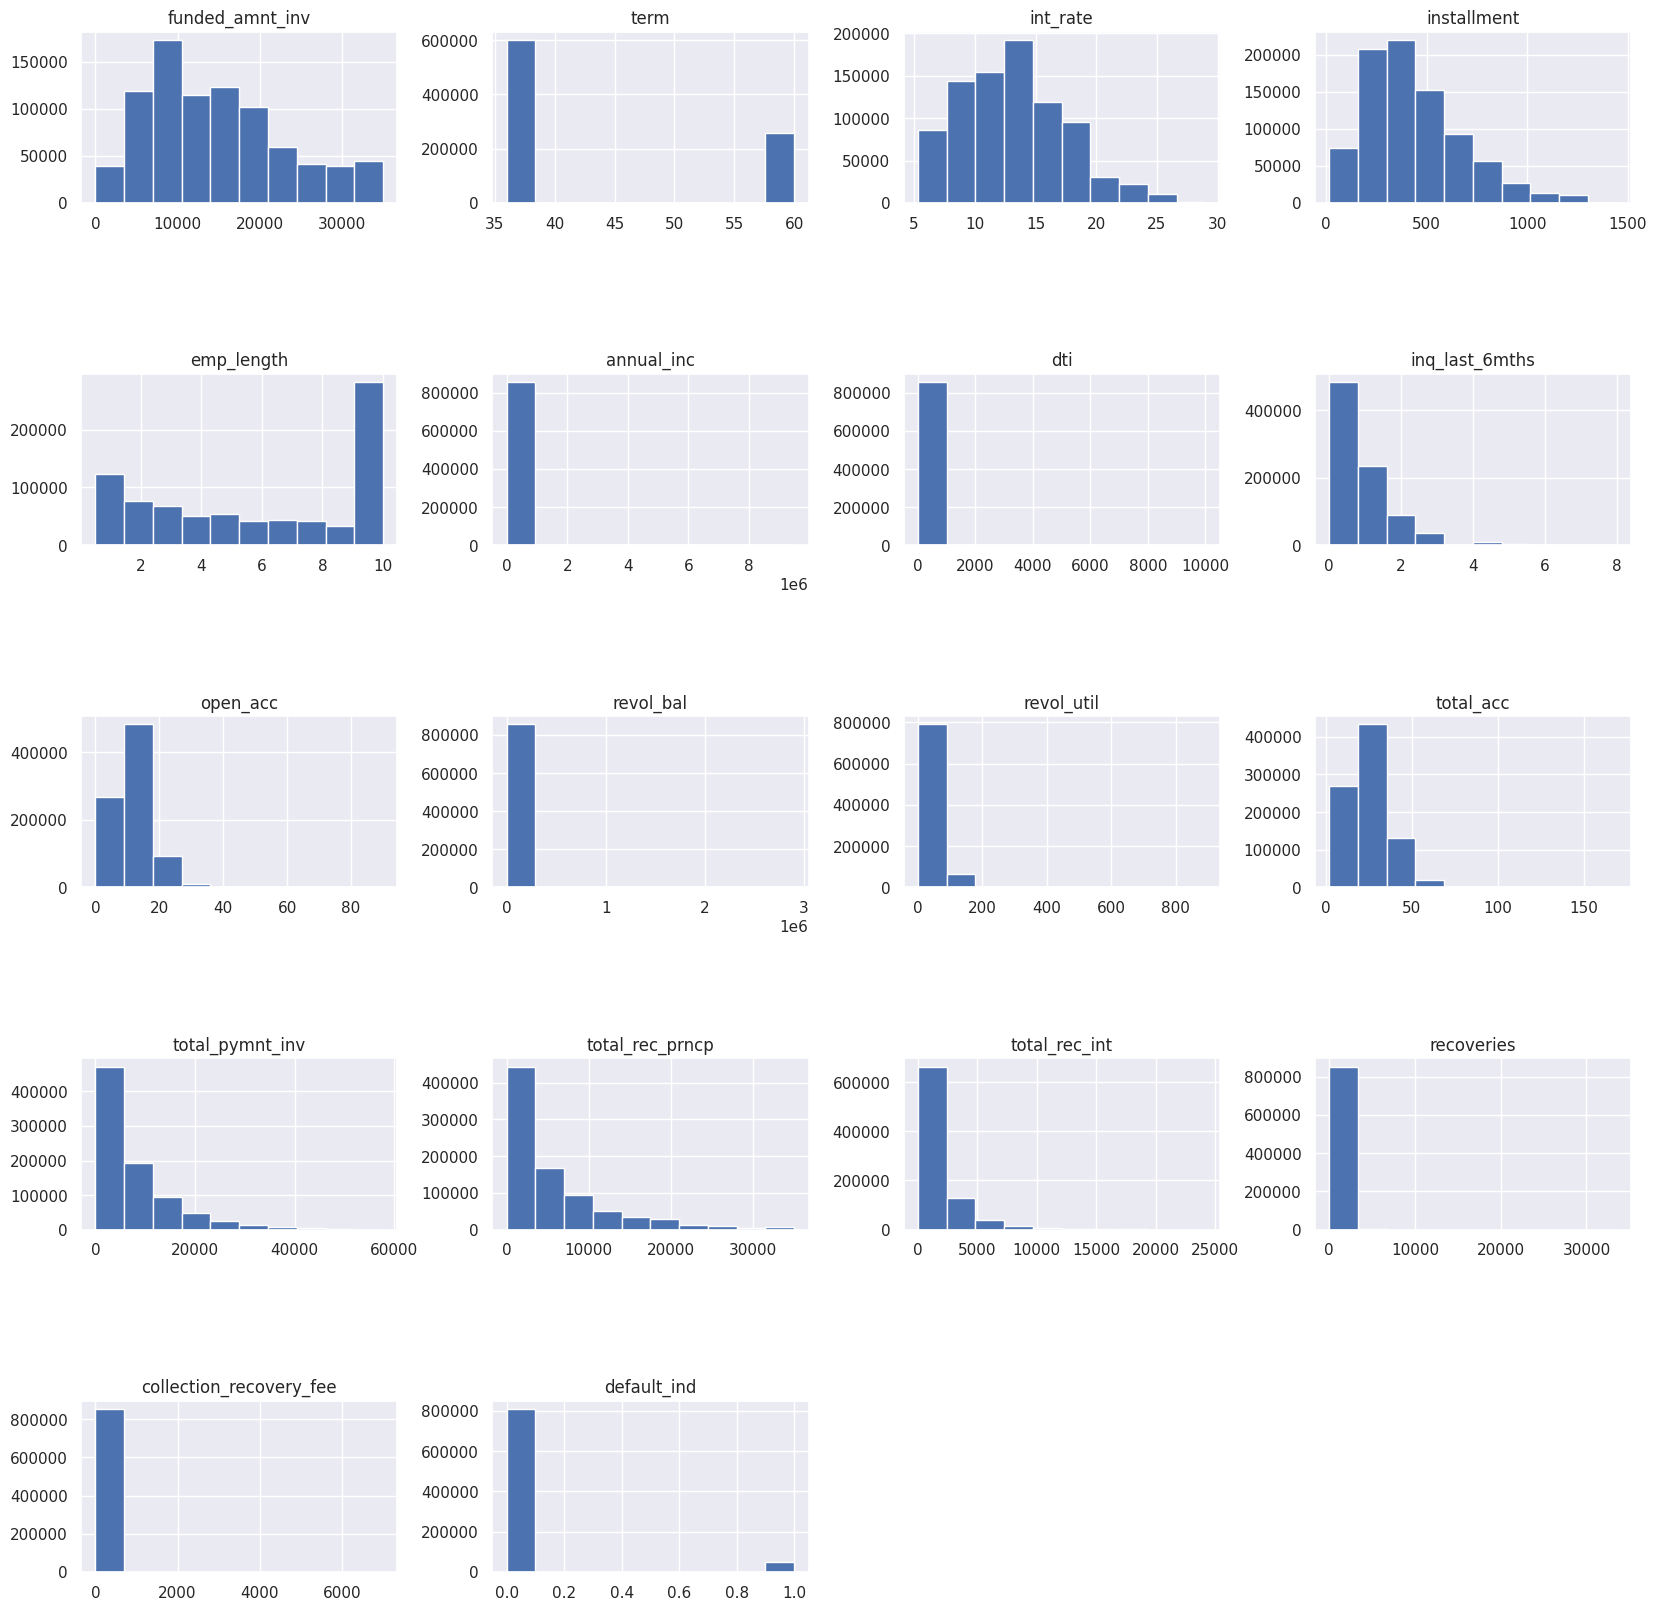

In [103]:
df.hist(figsize=(20,20))
plt.subplots_adjust(hspace=1);

The dataset had 855,969 rows and, 73 columns. After carefully reviewing the data, 45 un-meaningful columns were removed to keep the width of the dataset at a manageable size that has good information for problem-solving. Unwanted texts from the employment-length column were removed then the column was converted from object to numeric to avoid creating more dummies for modeling. As I wanted to keep as much data as possible for data analysis, we will deal with missing data later. By the end of data wrangling, the total number of columns is 25. 

# Exploratory Data Analysis

In this section, we will uncover any patterns, trends, and correlations between the target variable with independent features, and detect outliers or anomalous data to help answer the business questions and from there, features can be narrowed down for modeling. 



### Target variable default
First, let’s look at the default, a target variable of the problem-solving. Default happens when a borrower stops making required payments on a debt. According to TransUnion, in the first quarter of 2023, 3.91% of personal loan borrowers were late on their personal loan payments. The default rate of LendingClub is 5.4% as shown in the pie chart below. Why LendingClub default rate is so high? Is it because the platform is more advantageous for borrowers with economic difficulties, and low credit scores than traditional financial institutions, or individual investors are willing to tolerate the extra risk for higher returns? 

Text(0, 0.5, '')

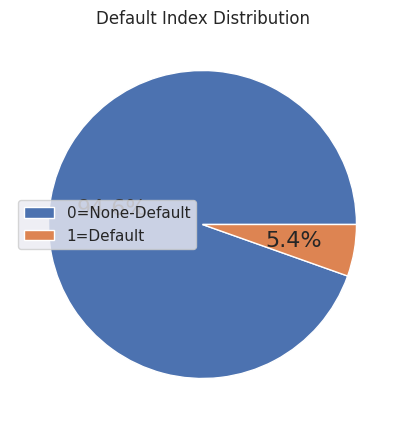

In [104]:
default_count=df.default_ind.value_counts()
default_count.rename(index={0:"0=None-Default",1:"1=Default"},inplace=True)
default_count.plot(kind="pie",legend="True",labels=None,textprops={'fontsize': 16},autopct='%1.1f%%',figsize=(5,5))
plt.title("Default Index Distribution")
plt.ylabel("")


### Default index vs numeric featers

In [105]:
#define a function to create scatterplotf of default against numeric feature

def boxplots (columns,ncol=None, figsize=(4,4)):
    if ncol is None:
        ncol=len(colums)
    sns.set(rc={'figure.figsize':(4,4)})
    for  col in columns:
        sns.catplot(x='default_ind',y=col,data=df,kind='box',sym="")
        plt.show()

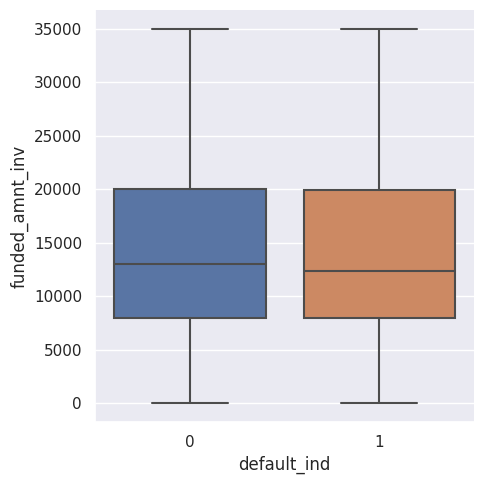

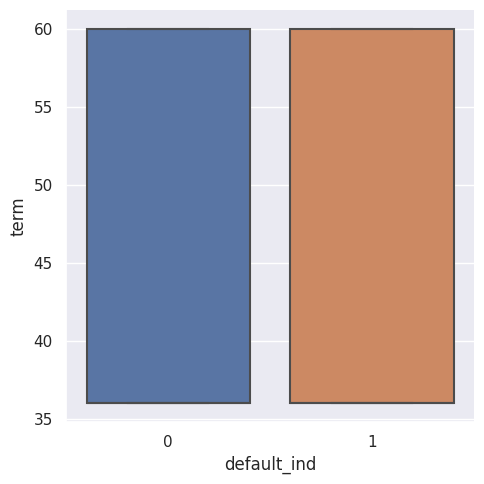

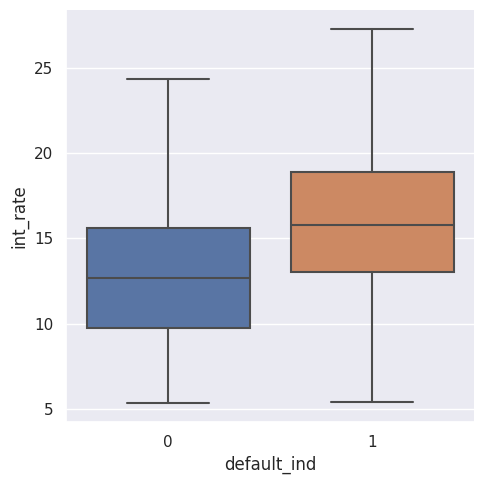

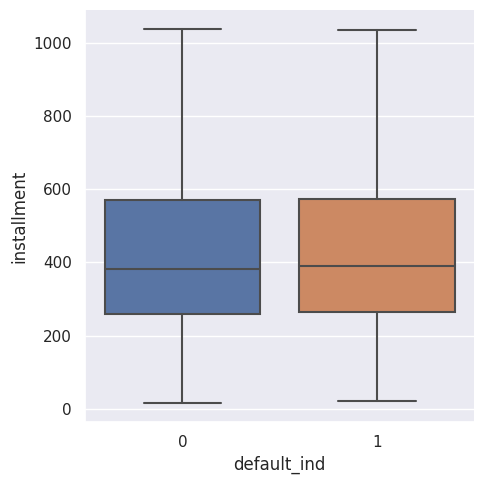

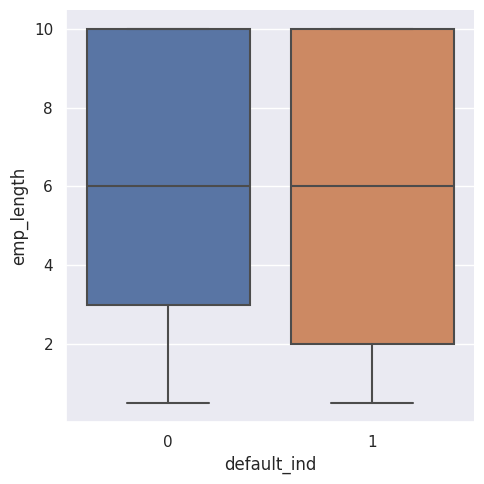

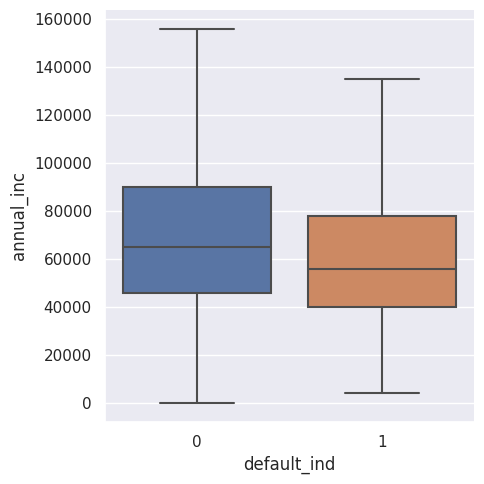

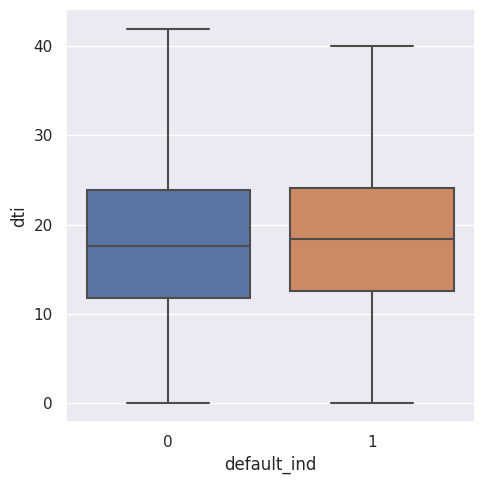

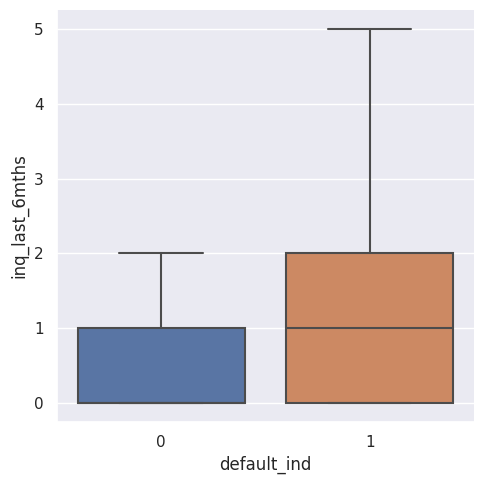

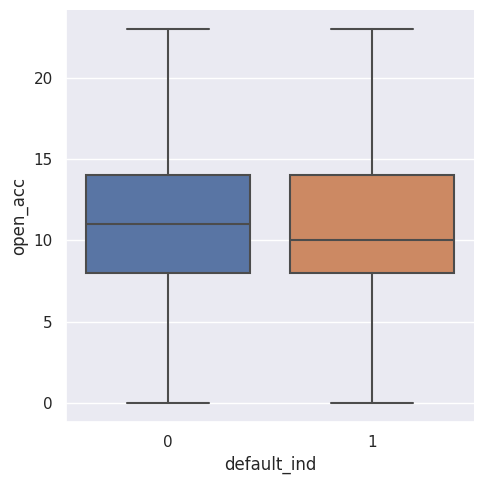

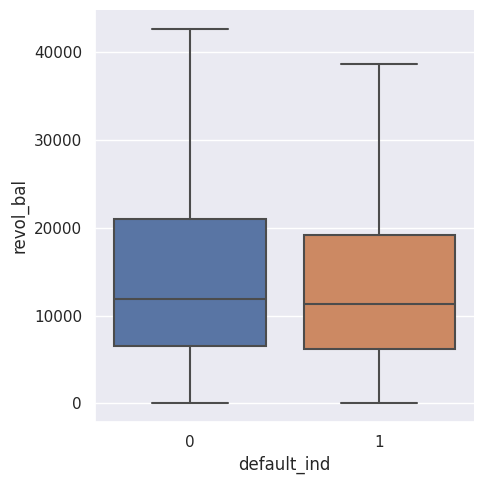

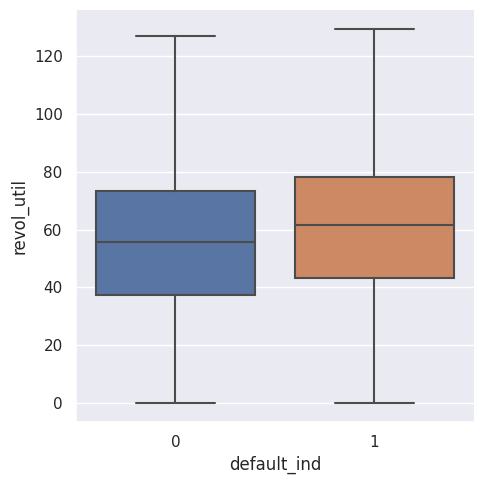

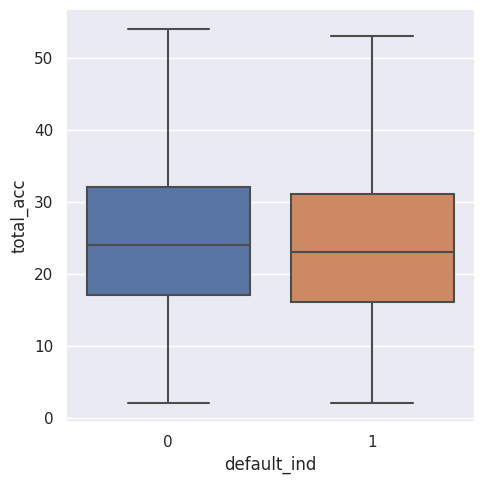

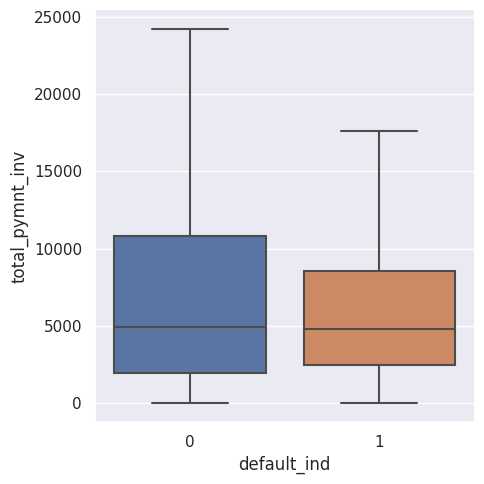

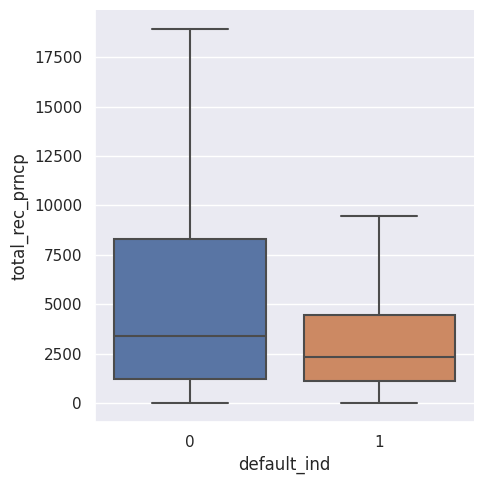

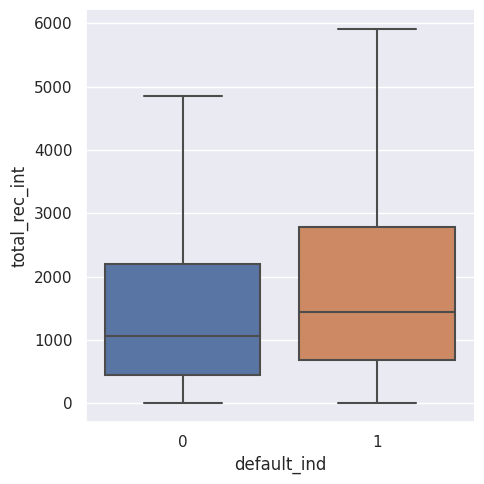

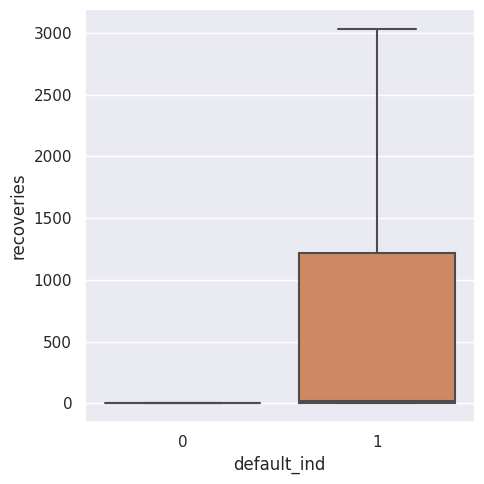

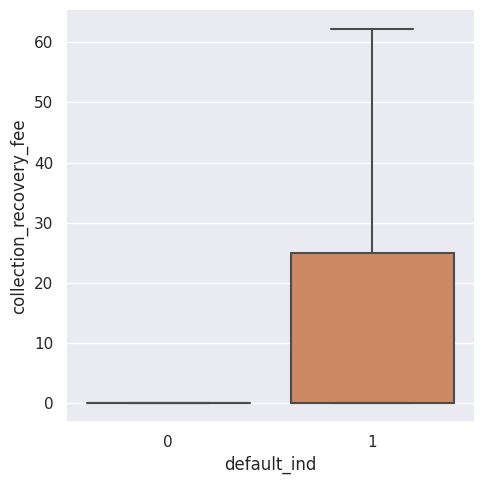

In [106]:
# select numeric features for boxplot and call boxplots
features= df.select_dtypes(include=np.number).columns.tolist()
features.remove("default_ind")
boxplots(features,ncol=3,figsize=(4,4))

Text(0.5, 1.0, 'Recoverries distribution of default_ind=1')

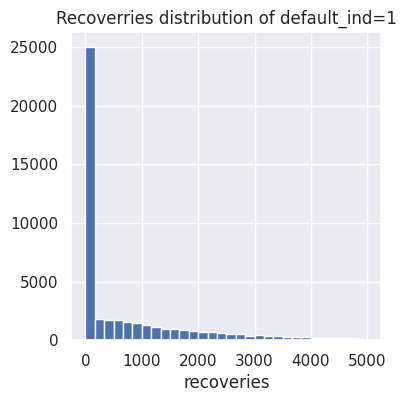

In [107]:
df_1=df[df.default_ind==1]
df_1.recoveries.hist(bins=30,range=(0,5000))
plt.xlabel("recoveries")
#plt.ylabel("default count")
plt.title("Recoverries distribution of default_ind=1")

(0.0, 200000.0)

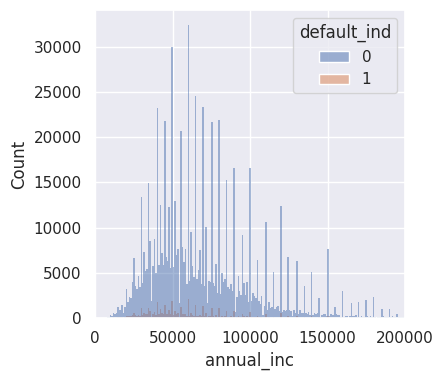

In [108]:
sns.histplot(x='annual_inc',data=df,hue='default_ind')
plt.xlim(0,200000)

## Numeric Feature Heatmap

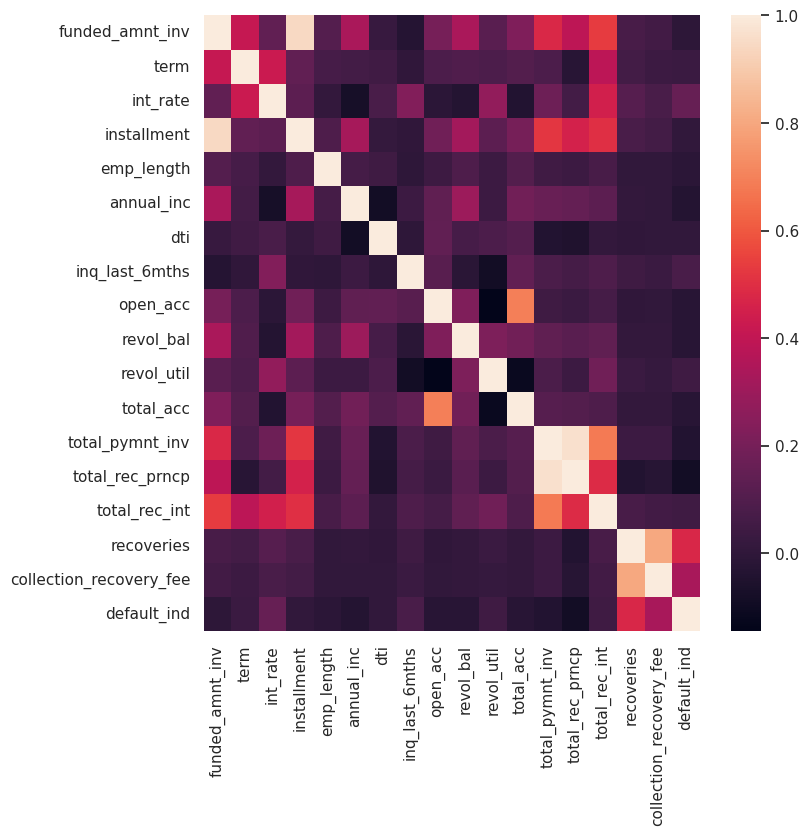

In [109]:
# show  a seaborn heatmap of correlation in numeric data
n_df=df.select_dtypes(include="number")
plt.subplots(figsize=(8,8))
sns.heatmap(n_df.corr());
plt.show()

Default loans seem to have some correlation with recoveries,collection fee, and interest but not much on the annual income.

Interest is the monetary charge for the privilege of borrowing money


Recoveries are “post-charge-off gross recovery” when a company writes off debt as a loss it believes it can no longer collect as the borrower has become delinquent on payments.  Charge-offs remain on the credit report for seven years. The borrowers are still responsible for the charge-off. As we can see, there are no examples of recovery occurring in cases of non-default. It seems anyone with recovery will default. 


Inquiry is an important aspect of the entire process of loan approval by which lenders evaluate borrower’s credit history and credit score. There are two types of inquiries. The hard inquiry is done for serious purposes only as they leave a record on the credit report of the borrower while soft inquiry is done by a borrower who wants to know his/her credit score or by a lender to offer pre-approved loans which does not affect your credit score. Frequent hard inquiries decrease credit scores as they can be seen as a symptom of financial insecurity of demand for extra credit. There is no way to know if inquiries shown in the data set are hard or soft inquiries, but my guess was, they are hard inquiries and they showed a strong correlation to the default. The average is one inquiry, but some bad loans had up to 5 inquiries.  Thus, it seems there is some relationship between the number of inquiries and likelihood of defauls



## How categorical features correlate to the target default

### loan purpose


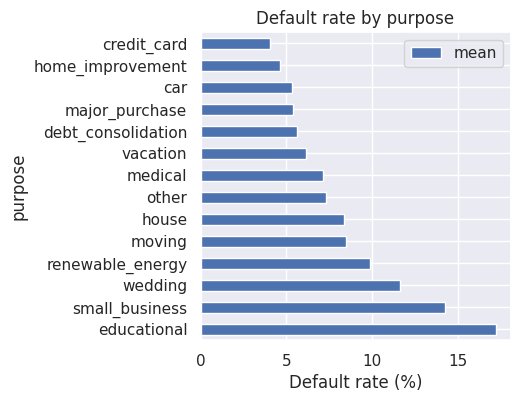

In [110]:
# find correlation between default and loan purpose
df_purpose=df.groupby("purpose")["default_ind"].agg(['mean']).sort_values('mean',ascending=False)
df_purpose['mean']=df_purpose["mean"]*100
#df_purpose.reset_index(inplace=True)

df_purpose.plot(kind='barh',title="Default rate by purpose")
plt.xlabel("Default rate (%)")
plt.show()

Personal loan can be used for a wide variety of major purchases and expenses. Surprisingly to see that educational loans had the highest default rate but the number matched with the U.S. Department of Education reports that about 20 percent of borrowers are in default and more than a million loans go into default each year.  Second on the list is the small business loan which I am not surprised about as doing business comes with risks. Wedding loan is third on the list. Weddings are personal events tied to emotion and going over your wedding budget is pretty common. 

### employment length

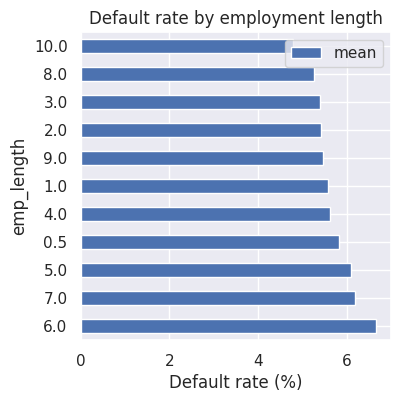

In [111]:
# find correlation between default and employment lenght

df_emp=df.groupby("emp_length")["default_ind"].agg(['mean']).sort_values('mean',ascending=False)
df_emp['mean']=df_emp["mean"]*100
#df_purpose.reset_index(inplace=True)

df_emp.plot(kind='barh',title="Default rate by employment length")
plt.xlabel("Default rate (%)")
plt.show()

Employment length does not show much correlation to default

### Homeownership
People who own a house or a property should think twice before defaulting on a loan. Besides damaging their credit, lenders or debt collectors can recover the money they own by taking them to court, garnishing their wages, and putting a lien on their property. They may also lose their collateral like the money in savings accounts. Therefore, the default rate is lower for these groups. On the other hand, people do not have property, they have less to lose so the chance of default is higher. 

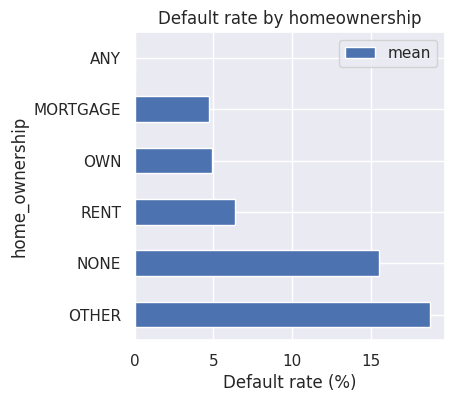

In [112]:
# find correlation between default and home ownership
df_home_ownership=df.groupby("home_ownership")["default_ind"].agg(['mean']).sort_values('mean',ascending=False)
df_home_ownership['mean']=df_home_ownership["mean"]*100
#df_purpose.reset_index(inplace=True)

df_home_ownership.plot(kind='barh',title="Default rate by homeownership")
plt.xlabel("Default rate (%)")
plt.show()

### Loan grade
Loan grade is a quality score to a loan based on a borrower’s credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. Loans grade A are the loans with the lowest expected risk of loss and therefore pay the lender the lowest interest. On the other hand, loans grade G pay the highest interest to compensate the lenders for the highest risk. The relationship between loan grade and interest is demonstrated in the box plot below. The average interest of grade A is 7% while grade G is 26%, almost 19% difference between the lowest risk to the highest risk loans. A 30% APR is pretty high for personal loans but it is what people pay for with their bad credit.  

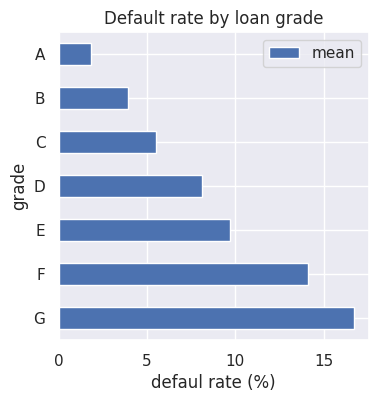

In [113]:
# find correlation between default and loan grade
#ax.set_facecolor("orange")
df_grade=df.groupby("grade")["default_ind"].agg(['mean']).sort_values('mean',ascending=False)
df_grade['mean']=df_grade["mean"]*100
df_grade.plot(kind='barh',title="Default rate by loan grade")
plt.xlabel("defaul rate (%)")
plt.show()

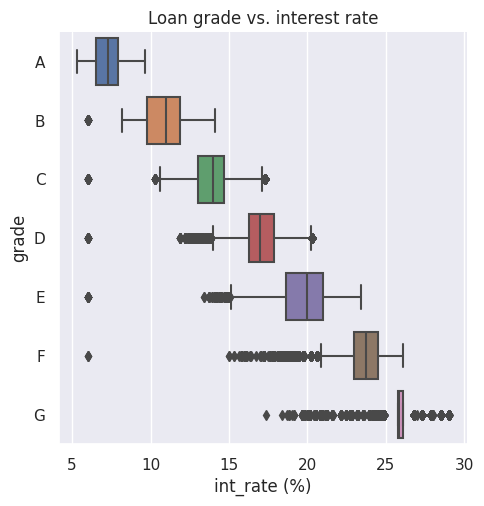

In [114]:
#ax=df.groupby("grade")["int_rate"].agg(['mean']).sort_values('mean',ascending=False).plot(kind='barh',title="Default rate by loan grade")
order=['A','B','C','D','E','F','G']
sns.catplot(x="int_rate",y="grade",data=df, kind='box',order=order)
plt.xlabel("int_rate (%)")
plt.title("Loan grade vs. interest rate")
plt.show()

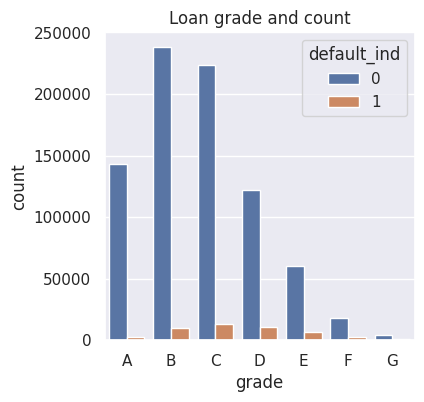

In [115]:
#plt.bar(x=df.grade, y=df.default_ind)
# Calculate profit of default loans for each loan grade
order=['A','B','C','D','E','F','G']
sns.countplot(data=df, x="grade", hue="default_ind", order=order)
plt.title("Loan grade and count")
plt.show()

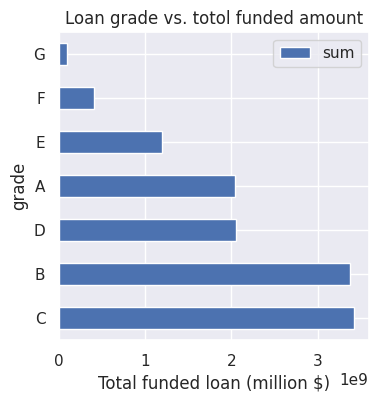

In [116]:
ax=df.groupby("grade")["funded_amnt_inv"].agg(['sum']).sort_values('sum',ascending=False).plot(kind='barh',title="Loan grade vs. totol funded amount")
#sns.catplot(x="funded_amnt_inv",y="grade",data=df, kind='box')
ax.set_xlabel("Total funded loan (million $)")
plt.show()

The average interest of grade A is 7% while grade G is 26%, a 19% difference between the lowest risk to the highest risk loans. A 30% APR is pretty high for personal loans but it is what people pay for with their bad credit.


There is a risk associated with any loan. Even loans grade A have defaults but the default rate is way less compared to lower loan grades. Grade A has 5% default while grade G has 28% default. Loan grades seems to have a strong direct correlation with defaults.  


### Profit

For my curiosity, I calculated profits by subtracting the funded amount from the total payment received by investors. The plot below shows the total loss of defaults for all loan grades. 


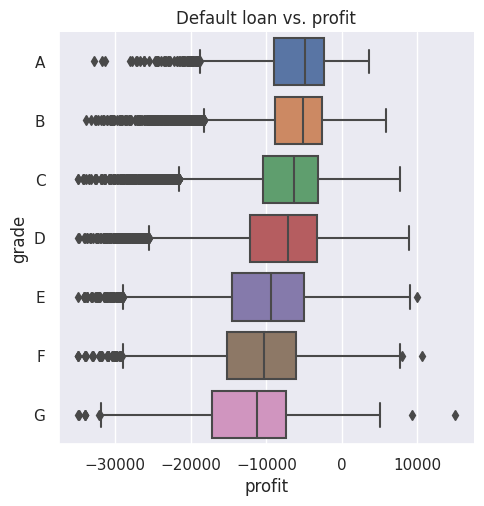

In [117]:
# Calculate profit of default loans for each loan grade
order=['A','B','C','D','E','F','G']
df['profit']=df["total_pymnt_inv"]-df["funded_amnt_inv"]
df['profit'].head()
sns.catplot(x="profit",y="grade",data=df[df.default_ind==1], kind='box', order = order)
#plt,xlabel("profit ($)")
plt.title("Default loan vs. profit")
plt.show()



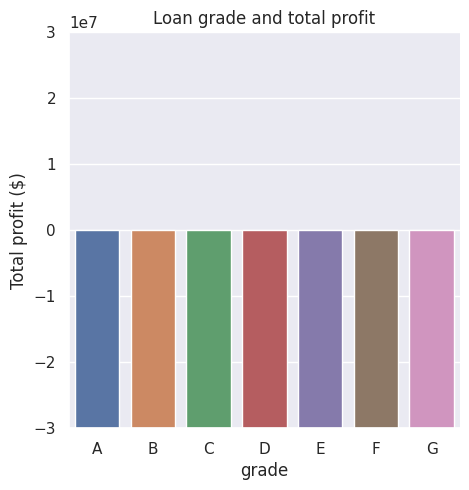

In [118]:
'''
# find profit for each loan grade
order=['A','B','C','D','E','F','G']
df_totalProfit=df.groupby("grade")["profit"].agg(['sum']).sort_values('sum',ascending=False)
df_totalProfit.reset_index(inplace=True)
sns.catplot(data=df_totalProfit, x="grade", y='sum', order=order,kind='bar')
plt.title("Loan grade and total profit")
plt.ylabel("Total profit ($)")
plt.ylim((-30000000,30000000))
plt.show()
'''

# Train/Test Split

### Missing data

In [119]:
df.isnull().sum().sort_values(ascending=False)

emp_length                 43061
revol_util                   446
funded_amnt_inv                0
open_acc                       0
default_ind                    0
collection_recovery_fee        0
recoveries                     0
total_rec_int                  0
total_rec_prncp                0
total_pymnt_inv                0
initial_list_status            0
total_acc                      0
revol_bal                      0
inq_last_6mths                 0
term                           0
dti                            0
purpose                        0
pymnt_plan                     0
verification_status            0
annual_inc                     0
home_ownership                 0
grade                          0
installment                    0
int_rate                       0
profit                         0
dtype: int64

### select independent and dependent features X and y

In [122]:

X=df.drop(['default_ind'],axis=1)
y=df['default_ind']


### Get dummies and split data into train and test sets

In [123]:
# get dummies for categorical features
X=pd.get_dummies(X)

# split data into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape)
print(X_test.shape)



(641976, 52)
(213993, 52)


Text(0, 0.5, '')

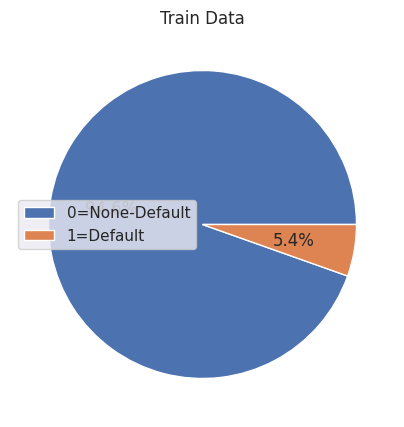

In [125]:
default_ytrain=y_train.value_counts()
default_ytrain.rename(index={0:"None-Default",1:"Default"},inplace=True)
default_count.plot(kind="pie",legend="True",labels=None,textprops={'fontsize': 12},autopct='%1.1f%%',figsize=(5,5))
plt.title("Train Data")

plt.ylabel("")

Text(0, 0.5, '')

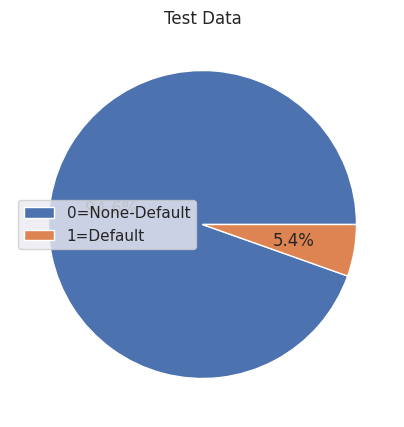

In [126]:
default_ytest=y_test.value_counts()
default_ytest.rename(index={0:"None-Default",1:"Default"},inplace=True)
default_count.plot(kind="pie",legend="True",labels=None,textprops={'fontsize': 12},autopct='%1.1f%%',figsize=(5,5))
plt.title("Test Data")
plt.ylabel("")

With a good understanding of all the features and their correlation, the data was split into train and test data sets with 25% test size. Categorical features were transformed into numerical ones, which can be used in machine learning models, statistical analysis. Remember during data wrangling, many missing values have been left untouched as we wanted to view the distribution from all loans. Those missing values will be imputed using scikit-learn imputer later on in modeling. After splitting the data, the default rate was about 5.5% for both train and test data sets.

# Model training 
A quick recall on this problem. We are trying to predict whether a loan applicant will default on the loan. The data is labeled which means we will be solving a supervised classification problem. After determining the type of machine learning, three models were chosen for training which were Logistic regression (LR), Random forest (RF), and Gradient boosting (GB) to find a best model. 

For each of the model, GridSearchCV was performed and best estimators were used by the models to find confusion matrix, also known as error matrix, to help us gain insight into how correct our predictions were compared to the actual values. Below is the terminology from a confusion matrix:


•	True positive( TP) = correctly classified as default =  test result that correctly indicates the presence of a condition or characteristic 

•	True negative (TN= correctly classified as non-default = A test result that correctly indicates the absence of a condition or characteristic 

•	False positive (FP) = incorrectly classified as default  = A test result which wrongly indicates that a particular condition or attribute is present 

•	False negative (FN) = incorrectly classified as non-default = A test result which wrongly indicates that a particular condition or attribute is absent 



Since, it is a classification problem, the following evaluation metrics were used to evaluate the model performance:


1/ Precision and Recall
•	Precision= TP/(TP+FP) which is a measurement of loans that identified as default. 
•	Recall = TP/(TP +FN) which tells us how many defaults are correctly identified


2/ ROC/AUC
•	ROC is receiver operating characteristic curve used to  summarize the model’s performance tradeoff with all classification thresholds between true positive rate (TPR) and false positive rate (FPR).  TPR=TP/(TP+FN) and FPR = FP/(FP+TN)
•	AUC is area under the ROC curve which used to measures the entire two-dimensional area underneath the entire ROC curve across all possible classification thresholds


## Logistic Regression Model

In [127]:
# define pipeline
pipe_lr = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LogisticRegression(solver = 'newton-cg', max_iter = 500)
)

#C = np.logspace(-4, 4, 50)
#penalty = ['l1', 'l2']
#grid_params = dict(    logistic_Reg__C=C,
#                      logistic_Reg__penalty=penalty)

grid_params={
    #'randomforestregressor__n_estimators':n_est,
    'standardscaler':[StandardScaler(),None],'logisticregression__penalty': ['l2','l1'],}

lr_grid_cv=GridSearchCV(pipe_lr,param_grid=grid_params,cv=2)
lr_grid_cv.fit(X_train,y_train)
lr_grid_cv.best_params_


{'logisticregression__penalty': 'l2', 'standardscaler': None}

In [128]:
# predict and print out scores for train and test datasets
y_train_predict_lr = lr_grid_cv.predict(X_train)
y_test_predict_lr = lr_grid_cv.predict(X_test)
print("\nScores from train data set")
print(classification_report(y_train,y_train_predict_lr))
print("\nScores from test data set")
print(classification_report(y_test,y_test_predict_lr))


Scores from train data set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    607173
           1       1.00      0.52      0.68     34803

    accuracy                           0.97    641976
   macro avg       0.99      0.76      0.84    641976
weighted avg       0.97      0.97      0.97    641976


Scores from test data set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    202329
           1       1.00      0.52      0.69     11664

    accuracy                           0.97    213993
   macro avg       0.99      0.76      0.84    213993
weighted avg       0.97      0.97      0.97    213993



In [129]:

# cross validate with the best estimator to find rpecision, recall, f1 scores
print(cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, cv=2,scoring=['precision','recall','f1']))

{'fit_time': array([409.43968463, 206.11513543]), 'score_time': array([1.19233608, 1.18499494]), 'test_precision': array([0.99834346, 0.99878988]), 'test_recall': array([0.51951037, 0.52172164]), 'test_f1': array([0.68339885, 0.68541446])}


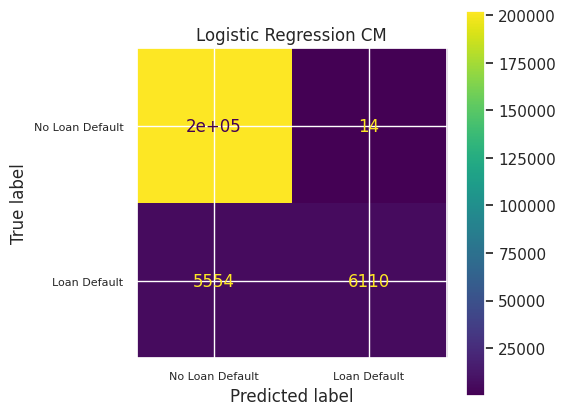

In [130]:
# plot confusion matrix
cm_lr = confusion_matrix(y_test, y_test_predict_lr,labels = lr_grid_cv.classes_)

_, ax = plt.subplots(figsize=(5,5))
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix = cm_lr, 
                                    display_labels = ['No Loan Default', 'Loan Default'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_yticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_title("Logistic Regression CM")
display_cm_lr.plot(ax = ax)

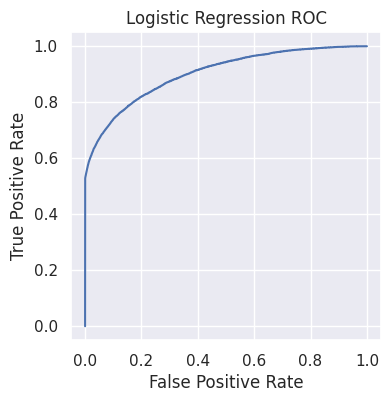

<Figure size 300x300 with 0 Axes>

In [131]:

y_test_pred_lr_proba=lr_grid_cv.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr,_=metrics.roc_curve(y_test,y_test_pred_lr_proba)

#create ROC curve
plt.plot(fpr_lr,tpr_lr)
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.title("Logistic Regression ROC")
plt.figure(figsize=(3,3))
plt.show()

#print(fpr_lr)
#print(tpr_lr)

In [132]:
# find AUC 
auc_lr=metrics.roc_auc_score(y_test,y_test_pred_lr_proba)
print(auc_lr)

0.9024880065871608


In [133]:
# compute feature importances
lr_fi = permutation_importance(lr_grid_cv, X_train, y_train)
lr_fi_df = pd.DataFrame(lr_fi['importances_mean'], index=X_train.columns,columns=["fi"])
# sort and print out top 10 feature importances 
lr_fi_df_sorted=lr_fi_df.fi.sort_values(ascending=False)
lr_fi_df_sorted.head(10)

grade_A                    0.087374
int_rate                   0.086214
installment                0.051328
recoveries                 0.042411
grade_B                    0.036332
funded_amnt_inv            0.022272
grade_F                    0.013286
collection_recovery_fee    0.009196
total_pymnt_inv            0.003439
total_rec_int              0.003201
Name: fi, dtype: float64

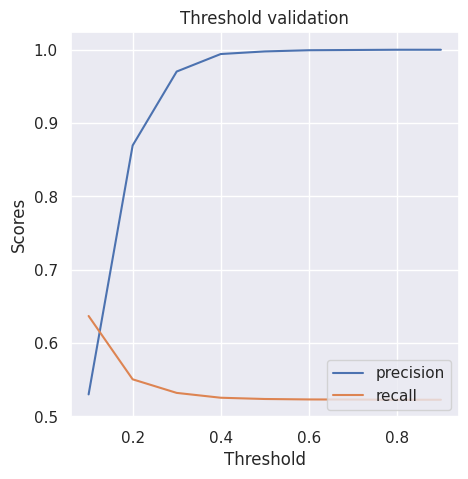

In [134]:
# find scores with diffrent threshold
threshold_list = np.arange(0.1, 1, 0.1).tolist()
precision_list_lr=[]
recall_list_lr=[]
for i in threshold_list:
    #print(i)
    y_pred_new_threshold = (lr_grid_cv.predict_proba(X_test)[:, 1] >= i).astype(int)
    precision_list_lr.append(precision_score(y_test, y_pred_new_threshold))
    recall_list_lr.append(recall_score(y_test, y_pred_new_threshold))
    
# create precision, revall vs. threshold
f,(ax1)=plt.subplots(1,sharex=True,sharey=True,figsize=(5,5))
ax1.plot(threshold_list,precision_list_lr,label="precision")
ax1.legend(loc="lower right")
ax1.plot(threshold_list,recall_list_lr,label="recall")
ax1.legend(loc="lower right")
plt.ylabel('Scores')
plt.xlabel("Threshold")
plt.title("Threshold validation")
plt.show()

## Random Forest Classifier Model

In [135]:
# define pipeline for random forest clasifier
pipe_rf= make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1))

grid_params={
    'randomforestclassifier__n_estimators':[100,300,500],
    'standardscaler':[StandardScaler(),None],}

rf_grid_cv=GridSearchCV(pipe_rf,param_grid=grid_params,cv=2)
rf_grid_cv.fit(X_train,y_train)


rf_grid_cv.fit(X_train,y_train)
y_train_predict_rf=rf_grid_cv.predict(X_train)
y_test_predict_rf=rf_grid_cv.predict(X_test)

print("\nScores from train data set")
print(classification_report(y_train,y_train_predict_rf))
print("\nScores from test data set")
print(classification_report(y_test,y_test_predict_rf))


Scores from train data set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    607173
           1       1.00      1.00      1.00     34803

    accuracy                           1.00    641976
   macro avg       1.00      1.00      1.00    641976
weighted avg       1.00      1.00      1.00    641976


Scores from test data set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    202329
           1       1.00      0.55      0.71     11664

    accuracy                           0.98    213993
   macro avg       0.99      0.77      0.85    213993
weighted avg       0.98      0.98      0.97    213993



In [136]:
rf_grid_cv.best_params_

{'randomforestclassifier__n_estimators': 100, 'standardscaler': None}

In [137]:
# fit the model and print scores for both train and test datasets
rf_grid_cv.fit(X_train,y_train)
y_train_predict_rf=rf_grid_cv.predict(X_train)
y_test_predict_rf=rf_grid_cv.predict(X_test)

print("\nScores from train data set")
print(classification_report(y_train,y_train_predict_rf))
print("\nScores from test data set")
print(classification_report(y_test,y_test_predict_rf))


Scores from train data set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    607173
           1       1.00      1.00      1.00     34803

    accuracy                           1.00    641976
   macro avg       1.00      1.00      1.00    641976
weighted avg       1.00      1.00      1.00    641976


Scores from test data set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    202329
           1       1.00      0.55      0.71     11664

    accuracy                           0.98    213993
   macro avg       0.99      0.77      0.85    213993
weighted avg       0.98      0.98      0.97    213993



In [138]:
# cross validate with best estimators and find precision, recall, and f1 score
print( cross_validate(rf_grid_cv.best_estimator_,X_test, y_test, cv=2, scoring=['precision','recall','f1']))

{'fit_time': array([11.7575953 , 12.23629522]), 'score_time': array([1.08415174, 1.12122226]), 'test_precision': array([1., 1.]), 'test_recall': array([0.52280521, 0.52486283]), 'test_f1': array([0.68663439, 0.68840661])}


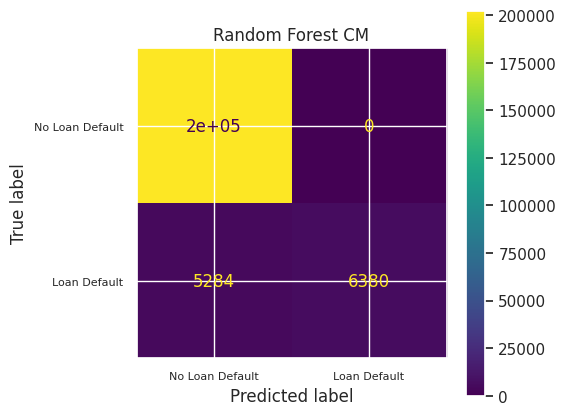

In [139]:
# plot confusion matrix
cm_rf = confusion_matrix(y_test, y_test_predict_rf,labels = rf_grid_cv.classes_)

_, ax = plt.subplots(figsize=(5,5))
display_cm_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf, 
                                    display_labels = ['No Loan Default', 'Loan Default'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_yticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_title("Random Forest CM")
display_cm_rf.plot(ax = ax)

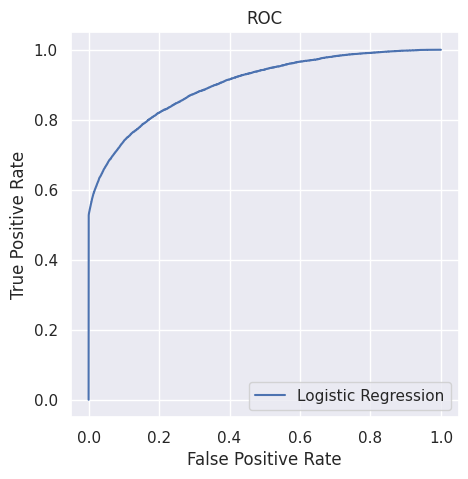

<Figure size 300x300 with 0 Axes>

In [140]:
y_test_pred_rf_proba=rf_grid_cv.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf,_=metrics.roc_curve(y_test,y_test_pred_rf_proba)

#create ROC curve
f,(ax1)=plt.subplots(1,sharex=True,sharey=True,figsize=(5,5))
ax1.plot(fpr_lr,tpr_lr,label="Logistic Regression")
ax1.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.figure(figsize=(3,3))
plt.show()

#print(fpr_rf)
#print(tpr_rf)

In [141]:
auc_rf=metrics.roc_auc_score(y_test,y_test_pred_rf_proba)
print(auc_rf)

0.9494409567747504


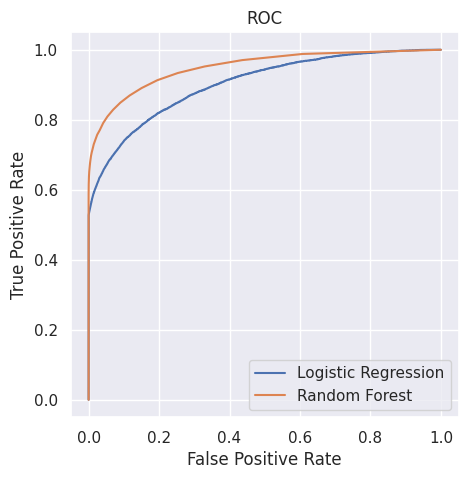

In [142]:
#create ROC curve
f,(ax1)=plt.subplots(1,sharex=True,sharey=True,figsize=(5,5))
ax1.plot(fpr_lr,tpr_lr,label="Logistic Regression")
ax1.legend(loc="lower right")
ax1.plot(fpr_rf,tpr_rf,label="Random Forest")
ax1.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.show()

### Gradient Boosting Model

In [143]:
# create pipeline and gridsearch for gradient boosting model
pipe_gb= make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
)

grid_params={
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.5,1],
    'standardscaler':[StandardScaler(),None],}
gb_grid_cv=GridSearchCV(pipe_gb,param_grid=grid_params,cv=2)
gb_grid_cv.fit(X_train, y_train)
gb_grid_cv.best_params_

{'gradientboostingclassifier__learning_rate': 1,
 'standardscaler': StandardScaler()}

In [144]:
# predict and print score for train and test datasets
y_train_predict_gb=gb_grid_cv.predict(X_train)
y_test_predict_gb=gb_grid_cv.predict(X_test)

print("\nScores from train data set")
print(classification_report(y_train,y_train_predict_gb))
print("\nScores from test data set")
print(classification_report(y_test,y_test_predict_gb))


Scores from train data set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    607173
           1       1.00      0.35      0.52     34803

    accuracy                           0.96    641976
   macro avg       0.98      0.67      0.75    641976
weighted avg       0.97      0.96      0.96    641976


Scores from test data set
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    202329
           1       1.00      0.35      0.51     11664

    accuracy                           0.96    213993
   macro avg       0.98      0.67      0.75    213993
weighted avg       0.97      0.96      0.96    213993



In [145]:

print( cross_validate(lr_grid_cv.best_estimator_,X_test, y_test, cv=2, scoring=['precision','recall','f1']))

{'fit_time': array([141.52325296, 121.05276537]), 'score_time': array([0.40279627, 0.40574813]), 'test_precision': array([0.99640288, 0.9983708 ]), 'test_recall': array([0.52246228, 0.52537723]), 'test_f1': array([0.68548931, 0.68846197])}


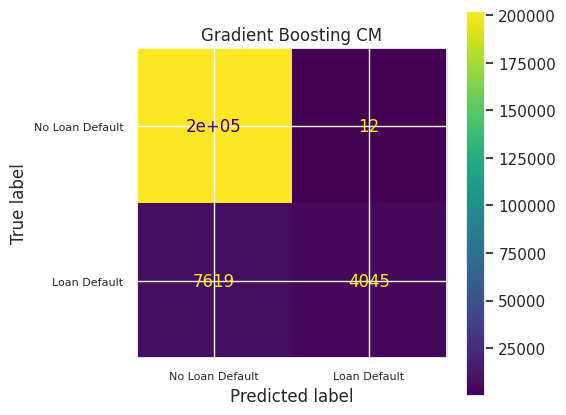

In [146]:
# plot confusion matrix
cm_gb = confusion_matrix(y_test, y_test_predict_gb,labels = gb_grid_cv.classes_)

_, ax = plt.subplots(figsize=(5,5))
display_cm_gb = ConfusionMatrixDisplay(confusion_matrix = cm_gb, 
                                    display_labels = ['No Loan Default', 'Loan Default'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_yticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_title("Gradient Boosting CM")
display_cm_gb.plot(ax = ax)

# Model Selection

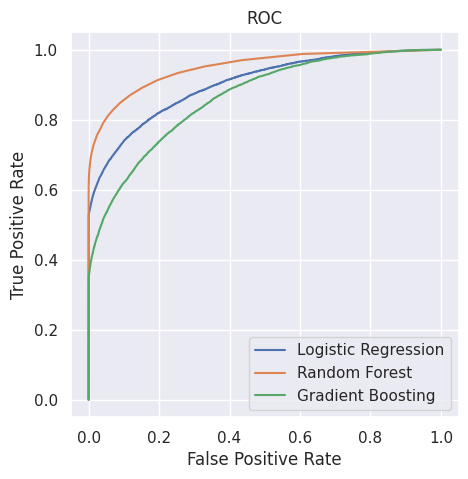

In [147]:
y_test_pred_gb_proba=gb_grid_cv.predict_proba(X_test)[::,1]
fpr_gb, tpr_gb,_=metrics.roc_curve(y_test,y_test_pred_gb_proba)

#create ROC curve
f,(ax1)=plt.subplots(1,sharex=True,sharey=True,figsize=(5,5))
ax1.plot(fpr_lr,tpr_lr,label="Logistic Regression")
ax1.legend(loc="lower right")
ax1.plot(fpr_rf,tpr_rf,label="Random Forest")
ax1.legend(loc="lower right")
ax1.plot(fpr_gb,tpr_gb,label="Gradient Boosting")
ax1.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.show()

In [148]:
auc_gb=metrics.roc_auc_score(y_test,y_test_pred_gb_proba)
print("AUC of Logistic Regression: ",round(auc_lr,2))
print("AUC of Random Forest:       ",round(auc_rf,2))
print("AUC of Gradient Boosting:   ",round(auc_gb,2))


AUC of Logistic Regression:  0.9
AUC of Random Forest:        0.95
AUC of Gradient Boosting:    0.86


In [149]:
grid_cv_list=[lr_grid_cv,rf_grid_cv,gb_grid_cv]
results_precision=[]
results_recall=[]
results_f1=[]

for grid_cv in grid_cv_list:
    
    scores= cross_validate(grid_cv,X_test, y_test, cv=2, scoring=['precision','recall','f1'])
    
    results_precision.append(scores['test_precision'])
    results_recall.append(scores['test_recall'])
    results_f1.append(scores['test_f1'])
    
print("precision: ",results_precision)
print("recall: ",results_recall)
print("f1: ",results_f1)


precision:  [array([0.99640288, 0.9983708 ]), array([1., 1.]), array([0.99285446, 1.        ])]
recall:  [array([0.52246228, 0.52537723]), array([0.52297668, 0.52486283]), array([0.4526749 , 0.27383402])]
f1:  [array([0.68548931, 0.68846197]), array([0.68678226, 0.68840661]), array([0.62183488, 0.42993673])]


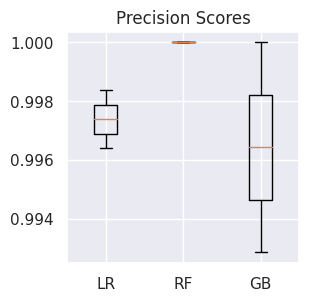

In [150]:
models=['LR',"RF","GB"]
_, ax = plt.subplots(figsize=(3,3))
ax.boxplot(results_precision,labels=models)
plt.title("Precision Scores")
plt.show()

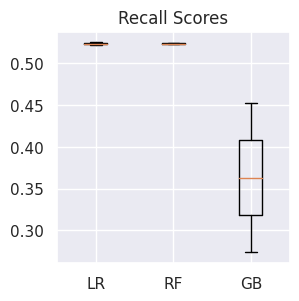

In [151]:
models=['LR',"RF","GB"]
_, ax = plt.subplots(figsize=(3,3))
ax.boxplot(results_recall,labels=models)
plt.title("Recall Scores")
plt.show()

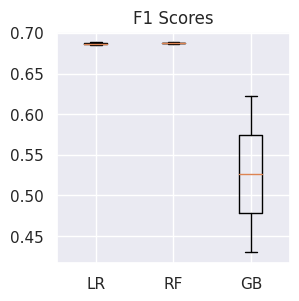

In [152]:
models=['LR',"RF","GB"]
_, ax = plt.subplots(figsize=(3,3))
ax.boxplot(results_f1,labels=models)
plt.title("F1 Scores")
plt.show()

Since, the data set is imbalanced, more good loan than bad loan, precision and recall are essential metric. From cross validation plots shown below,  Precision scores seem very high and tight for all models. Precision of 1 means there is no good loan incorrectly classified as default which means more loan get accepted, more returns for investor. Recall scores are pretty low. A recall score of 0.525 means there are many bad loans were incorrectly classified as non-default which is dangerous, investor will lose their invested money. F1 scores are bonus, the measurement of accuracy combining the precision and recall scores.  

From the ROC curve, all models seem to be pretty good as there models are closer to the upper left of the plot which mean larger AUC. The machine learning performance is better than 50% guessing job. TPR is the same as recall, high number is better. High FPR lower loan acceptance rate which means less loan less profit for investors but it protect them from default. 

### Feature importance

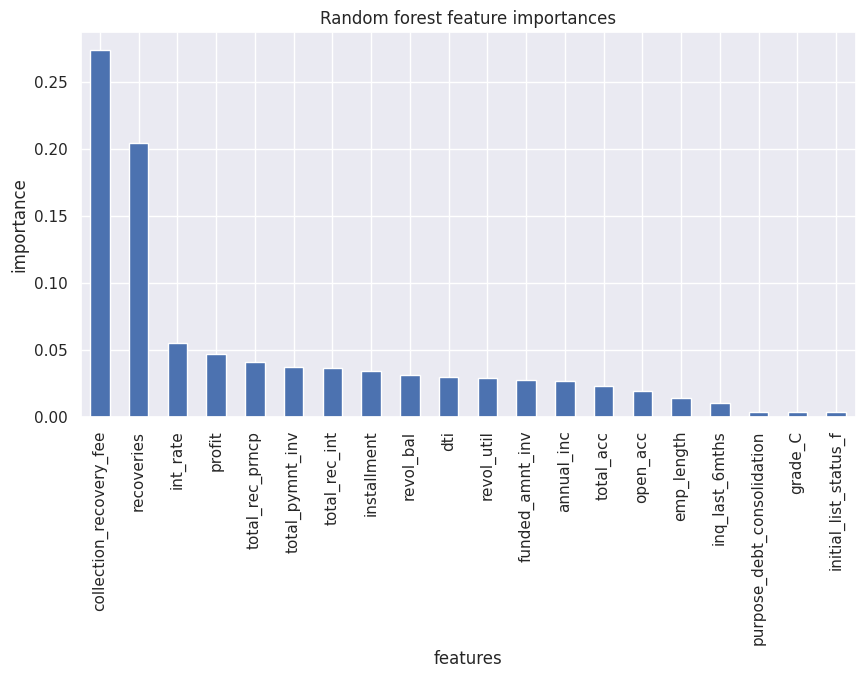

In [153]:
_, ax = plt.subplots(figsize=(10,5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(20).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Random forest feature importances');

Similar to what we saw in EDA section, recoveries, recovery fee and interest rate have strong correlation to default. 

### Random forest vs. threshold

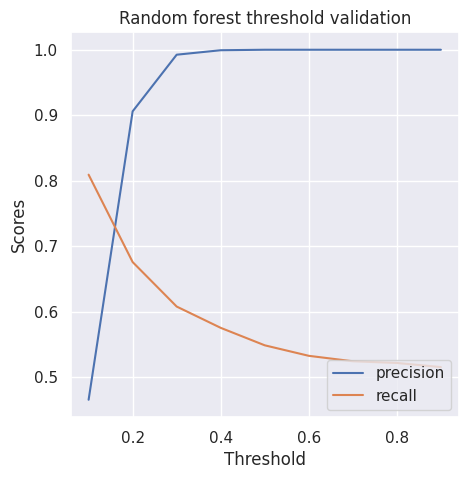

In [154]:
# find scores with diffrent threshold
threshold_list = np.arange(0.1, 1, 0.1).tolist()
precision_list_rf=[]
recall_list_rf=[]
for i in threshold_list:
    #print(i)
    y_pred_rf_new_threshold = (rf_grid_cv.predict_proba(X_test)[:, 1] >= i).astype(int)
    precision_list_rf.append(precision_score(y_test, y_pred_rf_new_threshold))
    recall_list_rf.append(recall_score(y_test, y_pred_rf_new_threshold))
    
# create precision, revall vs. threshold
f,(ax1)=plt.subplots(1,sharex=True,sharey=True,figsize=(5,5))
ax1.plot(threshold_list,precision_list_rf,label="precision")
ax1.legend(loc="lower right")
ax1.plot(threshold_list,recall_list_rf,label="recall")
ax1.legend(loc="lower right")
plt.ylabel('Scores')
plt.xlabel("Threshold")
plt.title("Random forest threshold validation")
plt.show()

0.2 seems like the best threshold for the trade-off between precision and recall

Precision of threshold 0.5:  1.0
Recall of threshold 0.5:  0.55


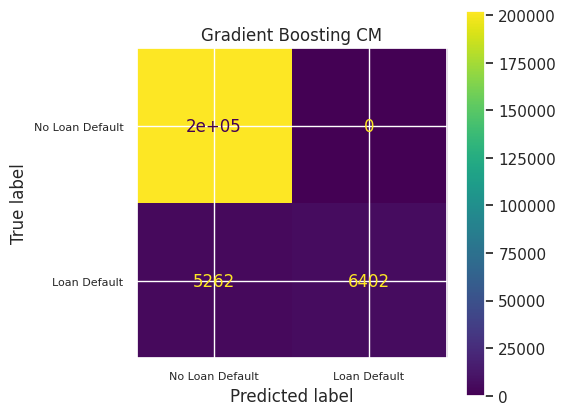

In [155]:
y_pred_rf_threshold_0p5 = (rf_grid_cv.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
print("Precision of threshold 0.5: ",round(precision_score(y_test, y_pred_rf_threshold_0p5),2))
print("Recall of threshold 0.5: ",round(recall_score(y_test, y_pred_rf_threshold_0p5),2))

# plot confusion matrix
cm_rf_0p5 = confusion_matrix(y_test, y_pred_rf_threshold_0p5,labels = rf_grid_cv.classes_)

_, ax = plt.subplots(figsize=(5,5))
display_cm_rf_0p5 = ConfusionMatrixDisplay(confusion_matrix = cm_rf_0p5, 
                                    display_labels = ['No Loan Default', 'Loan Default'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_yticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_title("Gradient Boosting CM")
display_cm_rf_0p5.plot(ax = ax)


Precision of threshold 0.2:  0.91
Recall of threshold 0.2:  0.68


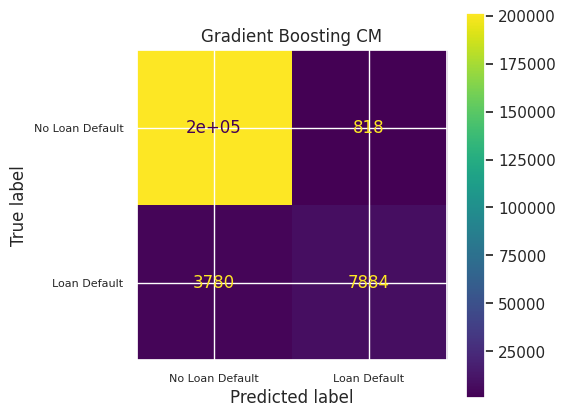

In [156]:
y_pred_rf_threshold_0p2 = (rf_grid_cv.predict_proba(X_test)[:, 1] >= 0.2).astype(int)
print("Precision of threshold 0.2: ",round(precision_score(y_test, y_pred_rf_threshold_0p2),2))
print("Recall of threshold 0.2: ",round(recall_score(y_test, y_pred_rf_threshold_0p2),2))

# plot confusion matrix
cm_rf_0p2 = confusion_matrix(y_test, y_pred_rf_threshold_0p2,labels = rf_grid_cv.classes_)

_, ax = plt.subplots(figsize=(5,5))
display_cm_rf_0p2 = ConfusionMatrixDisplay(confusion_matrix = cm_rf_0p2, 
                                    display_labels = ['No Loan Default', 'Loan Default'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_yticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_title("Gradient Boosting CM")
display_cm_rf_0p2.plot(ax = ax)

# Model conclusion
Focusing on the need to maximizing returns and minimizing risks for investors, random forest classifier seems like the best model as it had the best performance scores. 
And 0.2 seems like the best threshold for the trade-off between precision and recall.


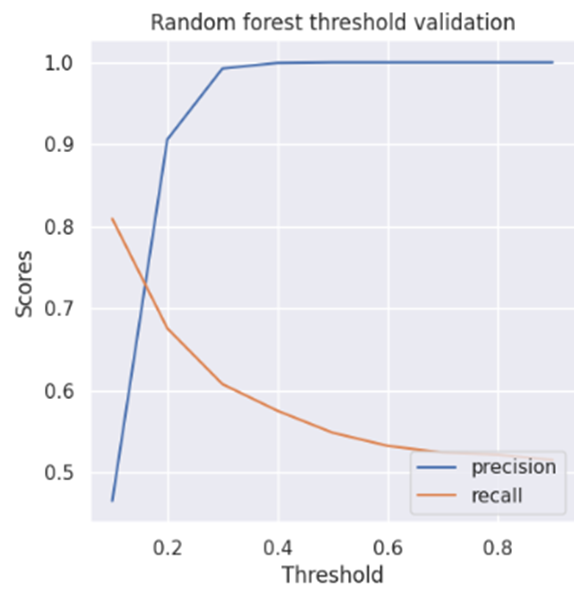

# Future improvement
We are in the middle of a challenging macroeconomic environment characterized by the highest inflation in 40 years, and the highest interest rate in 22 years which can weaken the economy and cause a chance of recession and stock market volatility. As a result, default risk increases as people lose jobs and can’t keep up with their payments. Now is the time to be conservative. I would recommend loan grades A, B, and C to investors as they have low default rates and are also top three funded loans which means they have investors’ trust.

